# STOCHASTIC GRADIENT DESCENT (SGD)

# $\theta ^{j+1} := \theta ^{j} - \eta(\epsilon _{j})x_{j}$

<b>$\theta ^{j+1}$ : Next location
<b>$\theta ^{j}$ : Current location
<b>$\eta$ : Learning coefficient
<b>$\epsilon_{j}$ : Error of J data point
<b>$x_{j}$ : The value of the J th feature

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import SGDRegressor

from yellowbrick.model_selection import CVScores


In [8]:
df = pd.read_csv(r'D:\githubProjects\Machine-Learning\Supervised Learning\Model Regularization\real_estate')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [9]:
X = df.drop(['Unnamed: 0','price'],axis=1)
y = df['price']

<b>SGD is sensitive to the scale of the properties and target variables, so we apply standard scaling to the values of all variables.

In [10]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = X_scaler.fit_transform(X)

y = y_scaler.fit_transform(y.values.reshape(-1,1))

<b>HOLD-OUT

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [12]:
sgd_reg = SGDRegressor(random_state=42,penalty='elasticnet')

<b>For the penalty rule in SGD optimization, we used the ElasticNet regression, which evaluates the L1 and L2 rules together. In this case, we need to determine how much weight we will make for L1 and L2.

<b>Hyperparameter Optimization

In [ ]:
params = {'alpha' : [0.0001,0.001,0.01],
          'eta0' : [0.0001,0.001,0.01,0.1],
          'l1_ratio' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'learning_rate' : ['constant','optimal','inscaling','adaptive'],
          'max_iter' : [50,100,500,1000]}

sgd_Gs = GridSearchCV(sgd_reg,params,n_jobs=-1,scoring='r2',cv=5).fit(X_train,y_train)

In [14]:
sgd_Gs.best_params_

{'alpha': 0.001,
 'eta0': 0.1,
 'l1_ratio': 0.7,
 'learning_rate': 'adaptive',
 'max_iter': 50}

<b>If l1_ratio = 1, the SGD model would be built according to Lasso(L1), if l1_ratio = 0, it would be built according to Ridge(L2).
The l1_ratio being 0.7 means that the linear regression model will be evaluated according to the ElasticNet regression.

In [15]:
sgd_Gs.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.1, l1_ratio=0.7, learning_rate='adaptive',
             max_iter=50, penalty='elasticnet', random_state=42)

<b>R2 of the optimum model

In [16]:
sgd_Gs.best_score_

0.7083899182622208

<b>Final Model

In [ ]:
sgd_final = sgd_reg.set_params(**sgd_Gs.best_params_).fit(X_train,y_train)

<b>Cross-Validate

In [ ]:
scores = cross_val_score(sgd_final,X_train,y_train,cv=5)

In [19]:
scores

array([0.60528962, 0.86596214, 0.76049417, 0.58436574, 0.72583792])

<b>visualization of cross-validation results

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was e

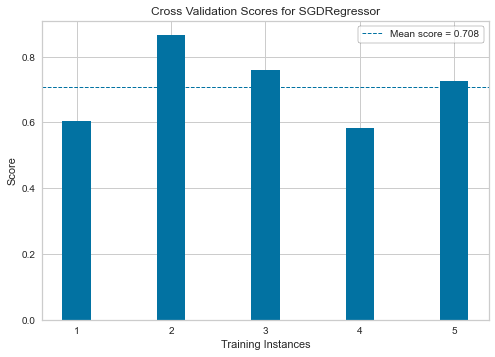

<AxesSubplot:title={'center':'Cross Validation Scores for SGDRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
cv= KFold(n_splits=5)
model = sgd_final
visualizer = CVScores(model,cv=cv,scoring='r2').fit(X_train,y_train)
visualizer.show()

<b>Estimation parameters coefficients

In [22]:
sgd_final.intercept_

array([0.01692942])